# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4" data-toc-modified-id="Rotación-de-P4-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotación de P4</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los retardadores

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   24/04/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Retardador  3 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.


After this formalism, we pass to Mueller using Jones-Mueller Transformation

**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2 y R3

1. Se deja P1 en 0 grados y P4 en 90 grados, en un ángulo fija.

1. Se hace un doble bucle for para R2 y R3.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de R2 y R3.
1. Parámetros de R2 y R3



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

## Tarjeta de adquisición de datos

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Motores

In [12]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]


In [13]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 7


In [14]:
# Intensidad con motores a 0
motors.get_position()

ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)

current positions = ([ 0.], [-0.], [-0.], [ 0.])
1.17299640668


## Mover P1 y P4

In [21]:
# Move motor 1 to maximum position of laser diode
Vels=[150,150,150,150]

pos0=0
pos4=90

motors.move(
        positions=[pos0, 0, 0, pos4], velocities=Vels, kind='polarizer', verbose=False)
motors.get_position()
get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True);

current positions = ([ 2.795], [-0.], [-0.], [ 251.889])
0.0626, 

In [22]:
angle_2=sp.linspace(0,180,11)
angle_3=sp.linspace(0,180,15)
Angle_2, Angle_3 = sp.meshgrid(angle_2, angle_3)
intensities=sp.zeros_like(Angle_2,dtype=float)
print( intensities.shape)

(15L, 11L)


In [24]:
for i2, a2 in enumerate(angle_2):
    print('\n {:2}/{}: '.format(i2, len(angle_2)), end='' )
    for i3, a3 in enumerate(angle_3):
        motors.move(
            positions=[pos0, a2,a3, pos4], velocities=Vels,  kind='polarizer', verbose=False)
        intensities[i3, i2]=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)


  0/11: 0.0575, 0.0831, 0.2213, 0.4208, 0.6767, 0.9530, 1.1935, 1.3419, 1.3521, 1.2088, 0.9376, 0.6255, 0.3338, 0.1394, 0.0575, 
  1/11: 0.1752, 0.0780, 0.0626, 0.2008, 0.4976, 0.8711, 1.1730, 1.2753, 1.1679, 0.9172, 0.6460, 0.4566, 0.3441, 0.2622, 0.1701, 
  2/11: 0.4311, 0.3441, 0.1701, 0.0524, 0.1394, 0.4157, 0.7278, 0.8916, 0.7995, 0.5232, 0.2366, 0.1240, 0.2008, 0.3492, 0.4259, 
  3/11: 0.7995, 0.8251, 0.6204, 0.3082, 0.0882, 0.0729, 0.2315, 0.4055, 0.4515, 0.3185, 0.1445, 0.1087, 0.2622, 0.5539, 0.7943, 
  4/11: 1.1628, 1.2344, 1.0911, 0.7636, 0.3952, 0.1394, 0.0575, 0.1138, 0.2008, 0.2673, 0.3236, 0.4362, 0.6408, 0.9172, 1.1525, 
  5/11: 1.3521, 1.3265, 1.1679, 0.9120, 0.6306, 0.3748, 0.1854, 0.0729, 0.0678, 0.1701, 0.3850, 0.6767, 0.9786, 1.2190, 1.3367, 
  6/11: 1.2293, 1.0962, 0.8455, 0.5999, 0.4566, 0.3901, 0.3287, 0.2264, 0.1036, 0.0626, 0.1906, 0.4976, 0.8660, 1.1525, 1.2242, 
  7/11: 0.8558, 0.7534, 0.4822, 0.2161, 0.1189, 0.2161, 0.3901, 0.4669, 0.3697, 0.1803, 0.0575, 

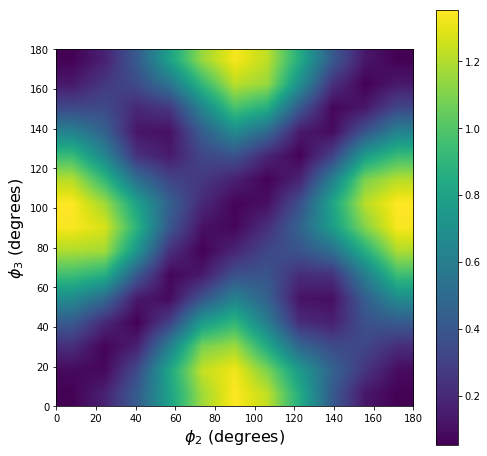

In [26]:
filename="step6_2retardadores_PL_cruzados{}".format(datetime.date.today())


plt.figure(figsize=(8,8))
plt.imshow(intensities,
            interpolation='bilinear',
                      aspect='auto',
            origin='lower',extent=[angle_2[0], angle_2[-1], angle_3[0], angle_3[-1]])
plt.xlabel('$\phi_2$ (degrees)', fontsize=16)
plt.ylabel('$\phi_3$ (degrees)', fontsize=16)
plt.axis('scaled')
plt.colorbar(orientation='vertical')
plt.savefig(filename+'.pdf')

In [27]:
data=dict(angle_2=angle_2, angle_3=angle_3, intensities=intensities)
data2=np.zeros((len(angle_3),len(angle_2), 3),dtype=float)
data2[:,:,0]=Angle_2
data2[:,:,1]=Angle_3
data2[:,:,2]=intensities
np.save(filename+'.npy', data2)
savemat(filename+'.mat', data, oned_as='row')

## Final

In [28]:
motors.close()
del motors
LabJackPython.Close()